In [6]:
import matplotlib.pyplot as plt
from math import acos, pi
from classifier import *
from convex_hull import *
from primitives import *
import random

In [7]:
def plotCH(ch,ch2):
    coord = ch.hull
    coord2 =ch2.hull
    coord2.append(coord2[0])
    coord.append(coord[0]) #repeat the first point to create a 'closed loop'

    xs = list(map( lambda pt : pt.x, coord)) #create lists of x and y values
    ys = list(map( lambda pt : pt.y, coord))
    xs2 = list(map( lambda pt : pt.x, coord2)) #create lists of x and y values
    ys2 = list(map( lambda pt : pt.y, coord2))
    print('Interpect' if(not areIndependent(ch,ch2)) else 'Dont Intercept')
    plt.figure()
    plt.plot(xs2,ys2)
    plt.plot(xs,ys) 
    if(areIndependent(ch,ch2)):
        r,s,p,q = separatingAxis(ch,ch2)
        qp = distP2P(q,p)
        pr = distP2P(r,p)
        rq = distP2P(q,r)
        theta = acos((qp**2+pr**2-rq**2)/(2*qp*pr)) * (180/pi)
        print(theta)
        lx = [p.x,q.x]
        ly = [p.y,q.y]
        plt.plot(lx,ly)
        lx = [r.x,s.x]
        ly = [r.y,s.y]
        plt.plot(lx,ly)
    plt.show()

Dont Intercept
20 30
35 57
a:  15 b:  27 c:  -1587.0
90.0


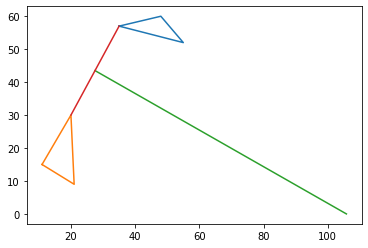

In [15]:
def randPoint(n, min,seed = 7):
    random.seed = seed
    pts = []
    for i in range(n):
        x = random.randint(min,min+ n*10)
        y = random.randint(min,min + n*10)
        pts.append(Point(x,y))
    return pts

k = 3
cv1 = Convex_hull(randPoint(k,0))
cv2 = Convex_hull(randPoint(k,k*5))
plotCH(cv1,cv2)